In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Predicting house prices
df=pd.read_csv('D:/ML Andrew Ngs/Week1/machine-learning-ex1/ex1/ex1data2.txt',names=['size','no_of_bedrooms','price'])
# names will add column name to the data

In [3]:
df.head()

,size,no_of_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
df.info() # Checking if any column is null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
size              47 non-null int64
no_of_bedrooms    47 non-null int64
price             47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [5]:
df.corr() # Checking corrrelation between features

,size,no_of_bedrooms,price
size,1.000000,0.559967,0.854988
no_of_bedrooms,0.559967,1.000000,0.442261
price,0.854988,0.442261,1.000000


In [6]:
# As size is in 1000 multiple so we have to normalise the data
def featureNormalize(feature):
    ''' For any feature this function will do feature scaling'''
    mean=feature.mean()
    std=feature.std()
    scaled=(feature-mean)/std
    return(scaled)

In [7]:
X1_scaled=featureNormalize(df['size'])
X2_scaled=featureNormalize(df['no_of_bedrooms'])

In [8]:
# collecting feature in X and price in Y
X=pd.DataFrame(data={'size':X1_scaled,'bedrooms':X2_scaled})
Y=df[['price']]

In [9]:
# Defining the necessary varaible
ones=np.ones(shape=(X.shape[0],1))
X=np.hstack((ones,X))
theta=np.zeros(shape=(X.shape[1],1))
m=len(df)
alpha=0.01
iteration=400

# Calculate Gradient descent
def gradientDescentMulti(X, Y, theta, alpha, iterations):
    for i in range(iterations):
        error = np.dot(X, theta) - Y
        theta = theta - (alpha/m) * np.dot(X.T,error)
    return theta

# Compute the error
def ComputeCost(X,Y,theta):
    h=np.dot(X,theta)
    err=(h-Y)**2
    J=1/(2*m)*np.sum(err)
    return(J)


In [10]:
# Ploting the loss function
J_hist=[]
for _ in range(iteration):
    error = np.dot(X, theta) - Y
    theta = theta - (alpha/m) * np.dot(X.T,error)
    loss=ComputeCost(X,Y,theta)
    J_hist.append(loss)


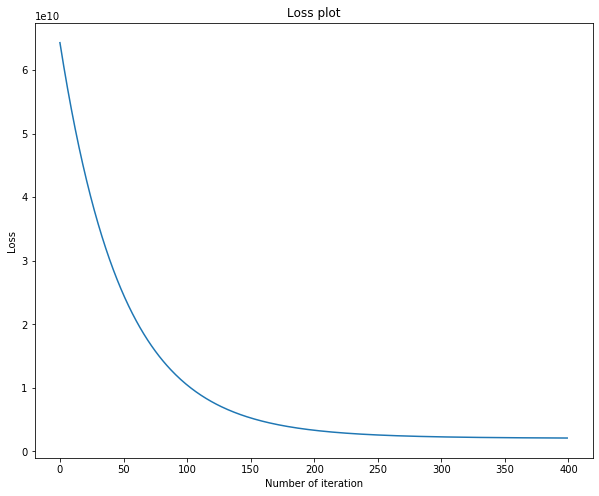

In [11]:
# Plotting the loss function
fig,ax=plt.subplots(figsize=(10,8))

ax.plot(range(iteration),J_hist)
ax.set_xlabel("Number of iteration")
ax.set_ylabel("Loss")

plt.title("Loss plot")
plt.show()

In [12]:
pred_error=ComputeCost(X,Y,gradientDescentMulti(X,Y,theta,alpha,iteration)) # Error made on prediction
print(pred_error)

price    2.044770e+09
dtype: float64
